In this notebook, we will discover and explore data from the stock market, particularly Netflix stocks and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!



# Getting the Data

we will use the netflix stock prices dataset downloaded from kaggle

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Virtual_internship/Stock-price-prediction/NFLX.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


we have data for 1009 records

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

the data is cleaned

# Closing Price




-It is the price at which the stock ends trading at the close of the trading day

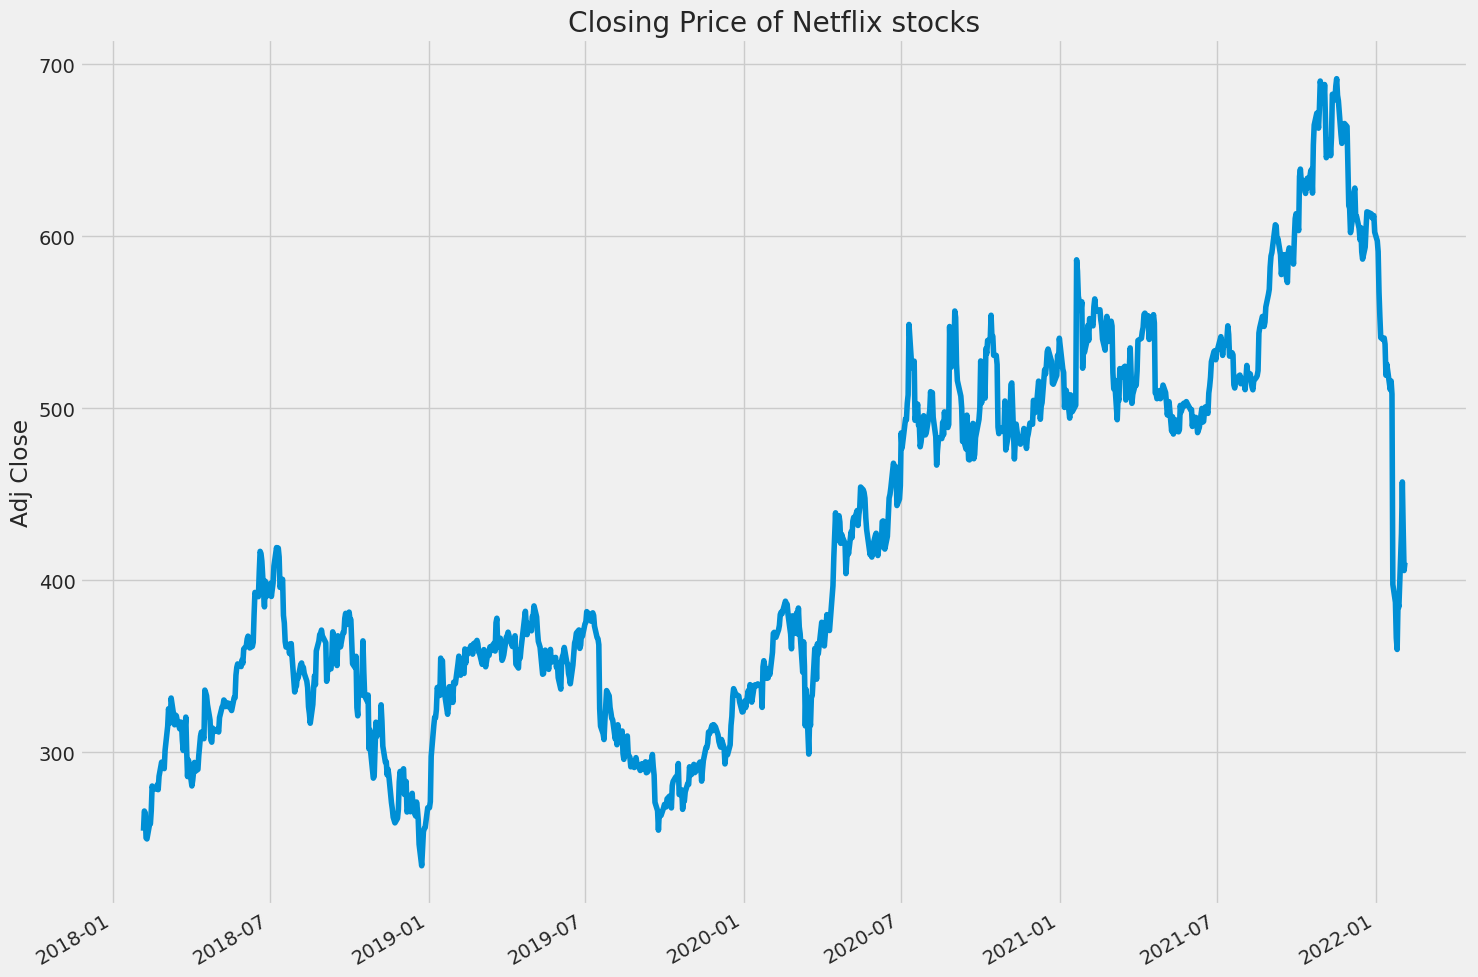

In [ ]:
#lets analyse the historical view of closing price
data.set_index('Date', inplace=True)
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
data['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Netflix stocks")

plt.tight_layout()

# Volume of Sales

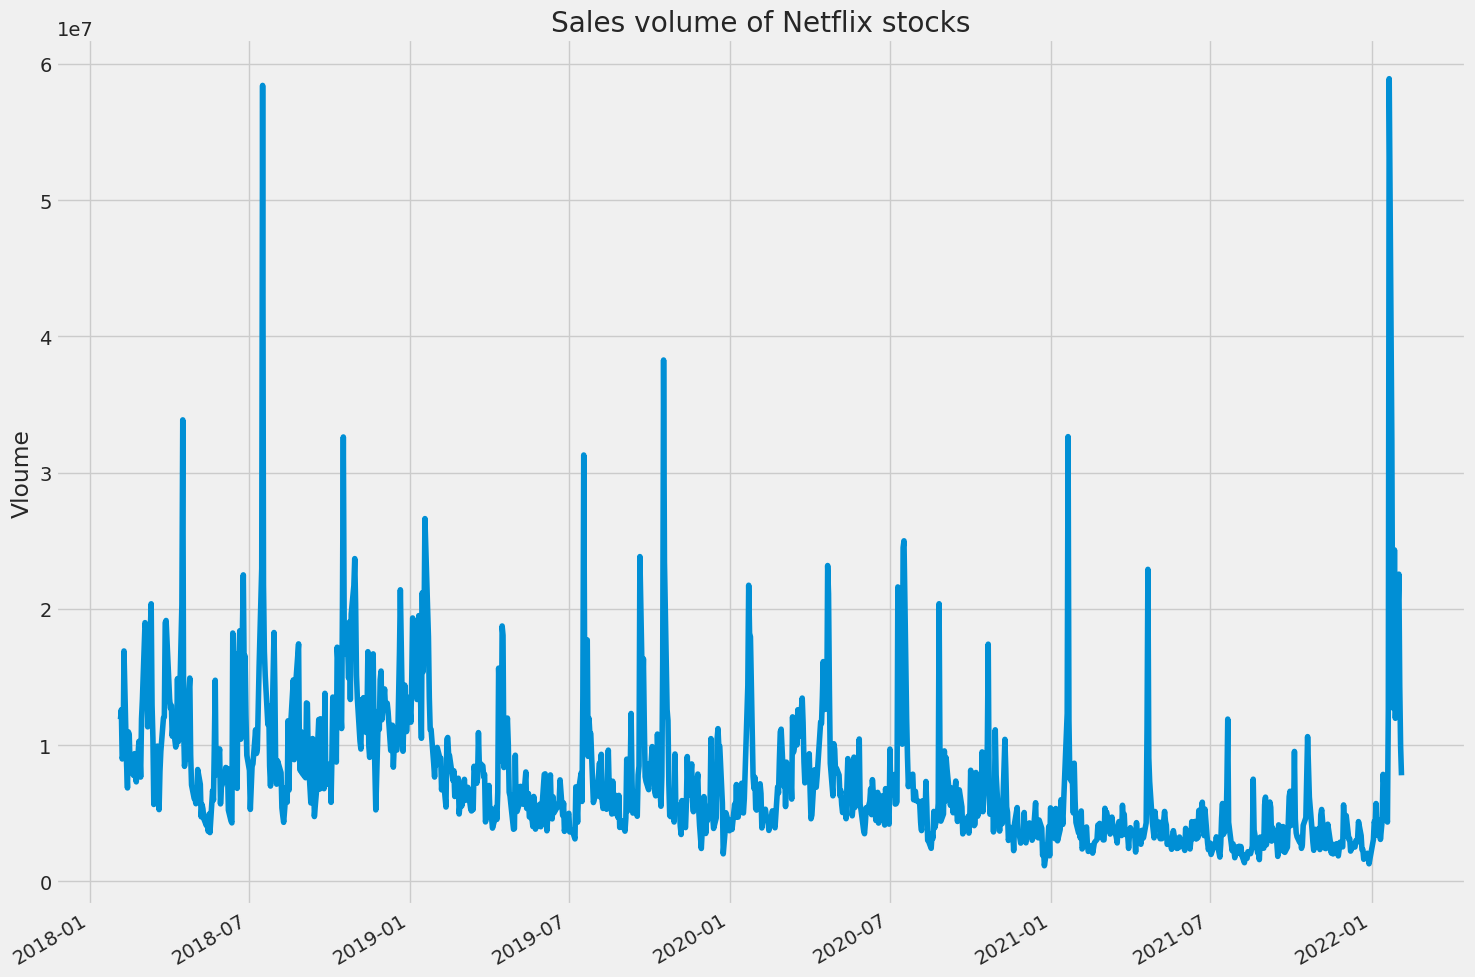

In [ ]:
#lets analyse the historical view of closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
data['Volume'].plot()
plt.ylabel('Vloume')
plt.xlabel(None)
plt.title("Sales volume of Netflix stocks")

plt.tight_layout()

# Let us see what was the moving average of the stock

<Figure size 1800x2200 with 0 Axes>

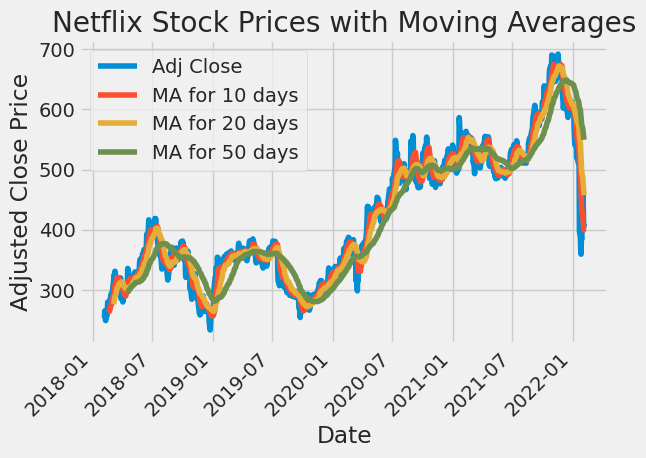

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Adj Close'].rolling(window=ma).mean()

# Plot the data
plt.figure(figsize=(18, 22))

data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('Netflix Stock Prices with Moving Averages')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Let us see What was the daily return of the stock on average?

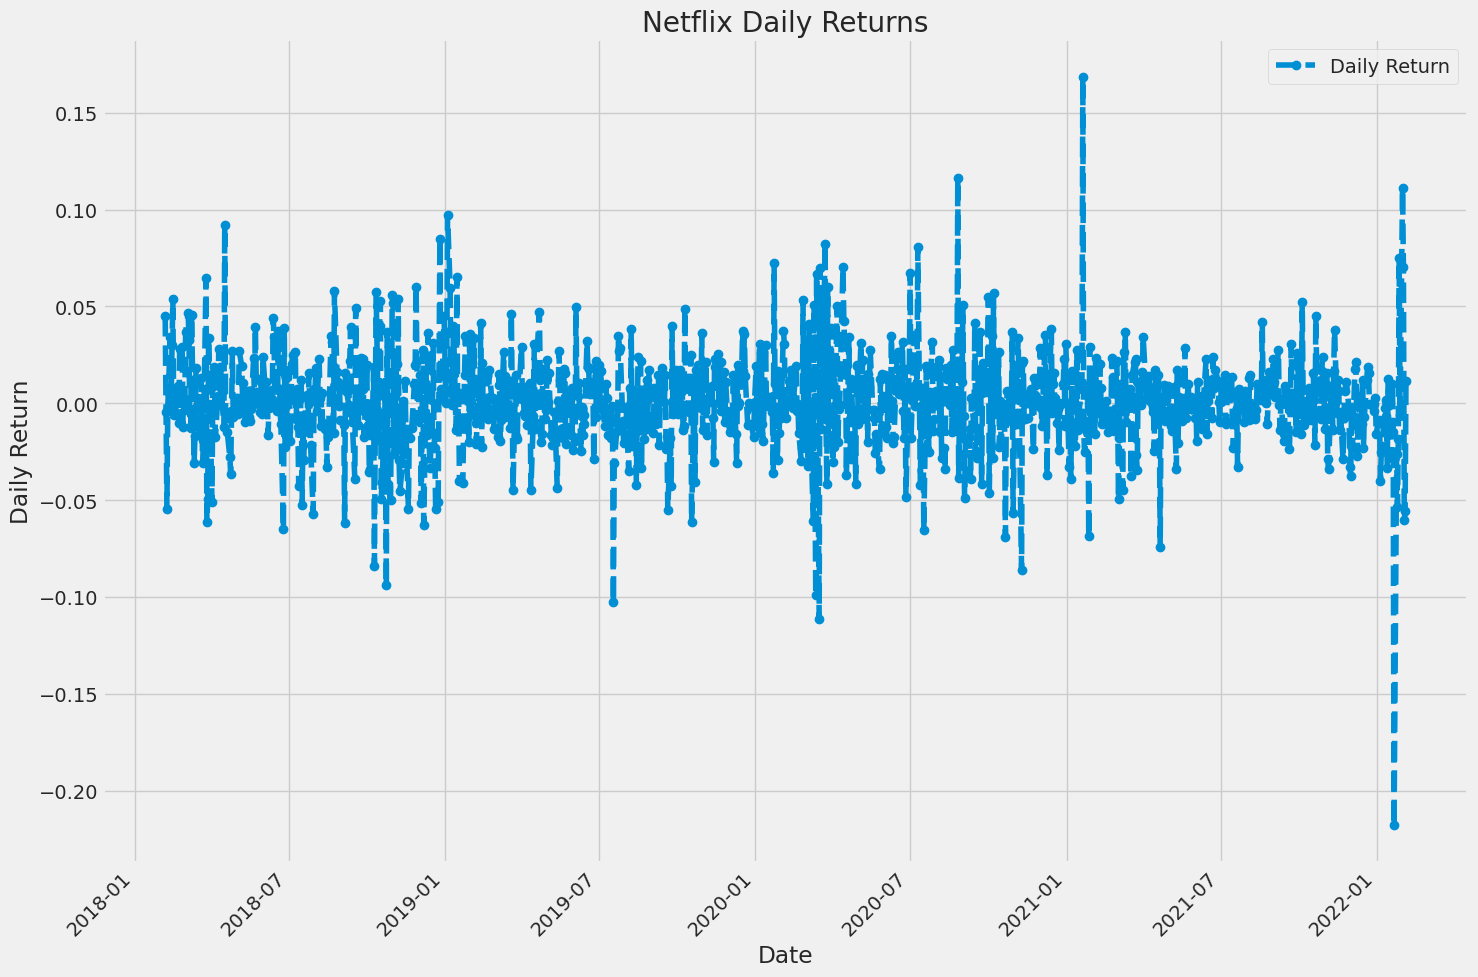

In [ ]:
#calculate the daily returns
data['Daily Return'] = data['Adj Close'].pct_change()
# Plot the daily returns
plt.figure(figsize=(15, 10))

data['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('Netflix Daily Returns')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Lets now predict the closing price of the netflix stocks using LSTM

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,NaN,NaN,NaN,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,NaN,NaN,NaN,-0.004366
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,NaN,NaN,NaN,-0.054657
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,NaN,NaN,NaN,-0.002519
...,...,...,...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,424.388000,487.853500,568.949401,0.111302
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,419.021002,480.841501,564.451600,0.070211
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,410.383005,472.758000,559.465201,-0.060486


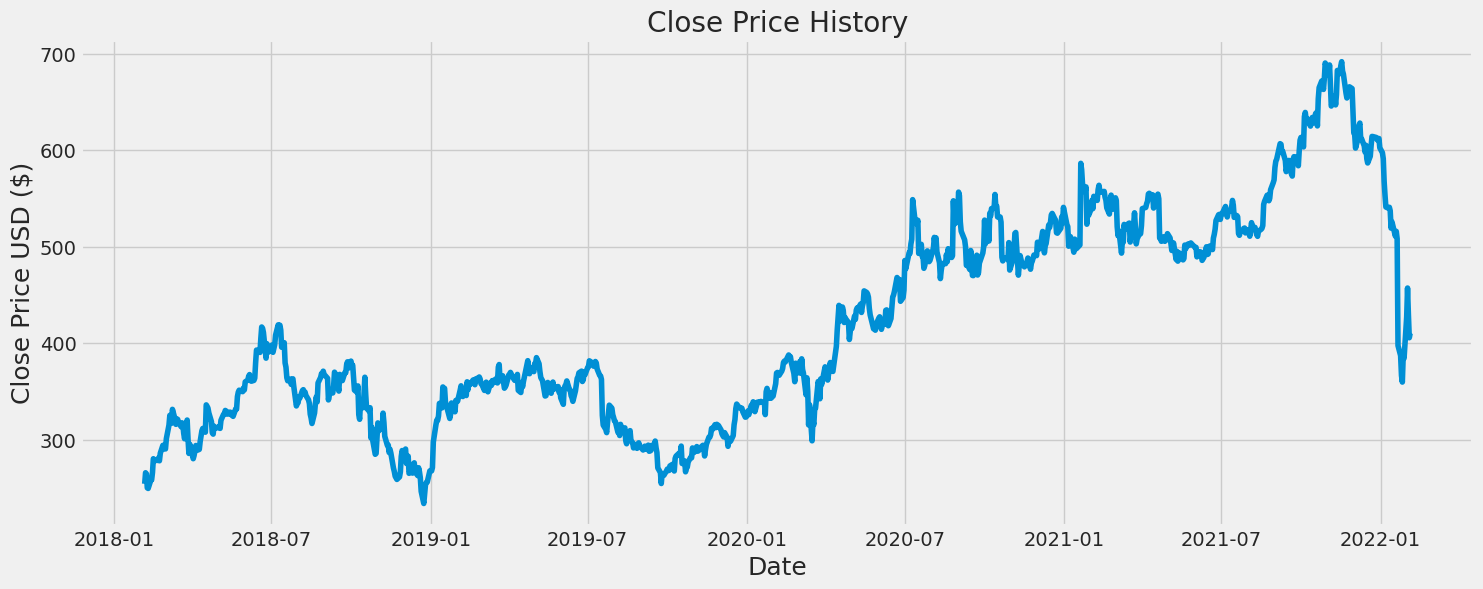

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#create a new dataframe with only close column
df = data.filter(['Close'])
#now we Convert the dataframe to a numpy array
dataset = df.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

959

In [ ]:
df

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [ ]:
dataset

array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  #For each index i, appends the previous 60 values to x_train.
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
899/899 [==============================] - 50s 51ms/step - loss: 0.0027
Epoch 2/20
899/899 [==============================] - 46s 52ms/step - loss: 0.0015
Epoch 3/20
899/899 [==============================] - 49s 54ms/step - loss: 0.0011
Epoch 4/20
899/899 [==============================] - 46s 51ms/step - loss: 0.0010
Epoch 5/20
899/899 [==============================] - 47s 52ms/step - loss: 0.0010
Epoch 6/20
899/899 [==============================] - 47s 52ms/step - loss: 9.8573e-04
Epoch 7/20
899/899 [==============================] - 48s 53ms/step - loss: 9.2878e-04
Epoch 8/20
899/899 [==============================] - 49s 54ms/step - loss: 9.4798e-04
Epoch 9/20
899/899 [==============================] - 47s 52ms/step - loss: 9.1910e-04
Epoch 10/20
899/899 [==============================] - 47s 52ms/step - loss: 9.1599e-04
Epoch 11/20
899/899 [==============================] - 47s 52ms/step - loss: 8.0799e-04
Epoch 12/20
899/899 [==============================] - 46s 52

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 2s 46ms/step


20.44852833099336

<ipython-input-24-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


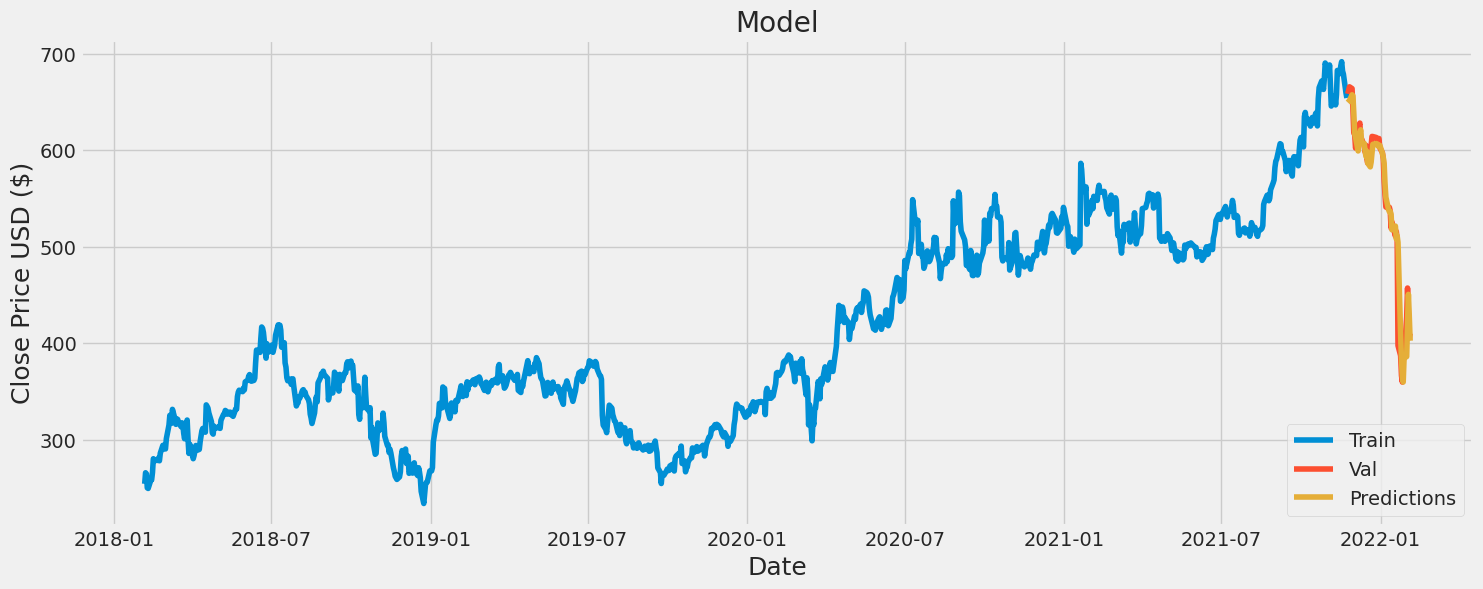

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid[['Close', 'Predictions']]

,Close,Predictions
Date,,
2021-11-24,658.289978,649.419434
2021-11-26,665.640015,651.389893
2021-11-29,663.840027,657.387512
2021-11-30,641.900024,656.284790
2021-12-01,617.770020,638.303101
2021-12-02,616.469971,616.922668
2021-12-03,602.130005,613.222351
2021-12-06,612.690002,599.167664
2021-12-07,625.580017,607.620361
